# 1. Loading and Preprocessing

In [506]:
# 1. Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [508]:
# 2.Load the dataset
data = fetch_california_housing()


In [510]:
# 3. Converting into DataFrame and analysing the dataset
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [512]:
# 4.Statistical summary of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [514]:
# 5.Displaying basic information about dataset for checking null values, datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [516]:
# 6. Checking the correlation between the features to find out :
# 1. Highly correlated variables
# 2. Variables with low relation to target variable

correlation_matrix=df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

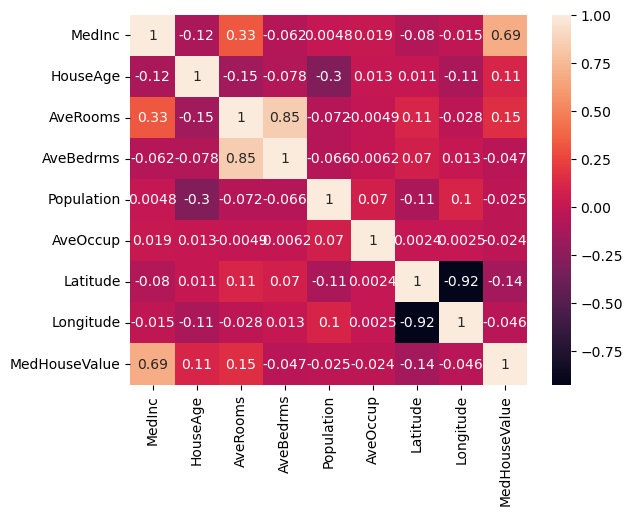

In [518]:
# 6.1.Plotting the correlation using a heatmap
sns.heatmap(correlation_matrix,annot=True)

In [520]:
# 6.2. Removing highly correlated and column with low correlation to target
columns_to_drop = ['Population','AveOccup','AveBedrms']
df = df.drop(columns=columns_to_drop)                             # low correlation with target hence dropped
df.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,37.85,-122.25,3.422


In [391]:
df.nunique()

MedInc           12928
HouseAge            52
AveRooms         19392
Latitude           862
Longitude          844
MedHouseValue     3842
dtype: int64

In [522]:
# 7.Datapreprocessing

In [524]:
# 7.1.Check for missing values
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [526]:
# 7.2. Checking for duplicate rows
df.duplicated().sum()

0

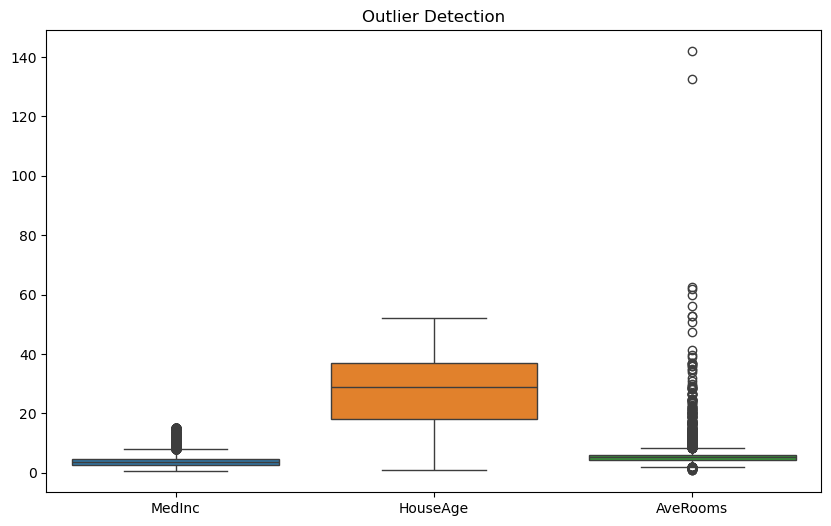

In [528]:
# 7.3.Detecting outliers
numerical_columns = ['MedInc', 'HouseAge', 'AveRooms']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Outlier Detection')
plt.show()

In [530]:
# 7.3.1.Treating the Outlier using IQR
outlier_columns = ['MedInc','AveRooms']

# Calculating the quartiles and IQR for the outlier columns
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Treating outlier using IQR method (capping at 1.5 times IQR)
outliers_lower = df[outlier_columns] < (Q1 - 1.5 * IQR)
outliers_upper = df[outlier_columns] > (Q3 + 1.5 * IQR)

# Capping the outliers to 1.5 times IQR
df[outlier_columns] = df[outlier_columns].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR, axis = 1)


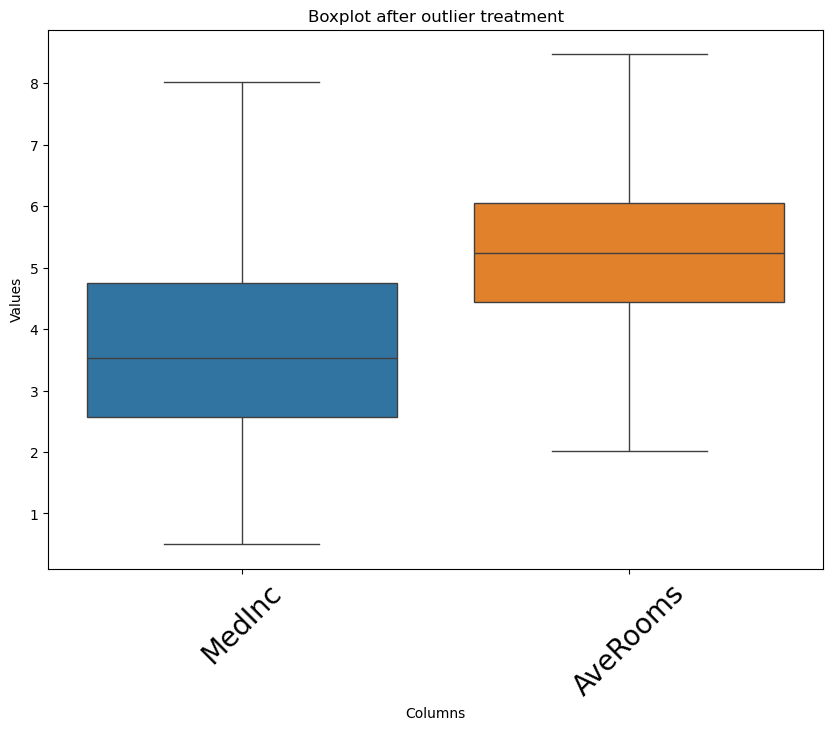

In [532]:
# 7.3.2 Rechecking outliers after capping

plt.figure(figsize = (10,7))
sns.boxplot(data=df[outlier_columns])
plt.title('Boxplot after outlier treatment')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, fontsize = 20)
plt.show()

In [534]:
df[outlier_columns].describe()

,MedInc,AveRooms
count,20640.000000,20640.000000
mean,3.801010,5.304740
std,1.657658,1.246177
min,0.499900,2.023219
25%,2.563400,4.440716
50%,3.534800,5.229129
75%,4.743250,6.052381
max,8.013025,8.469878


In [536]:
# 8.Checking skewness of numerical columns
skewness = df[outlier_columns].skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
MedInc      0.735618
AveRooms    0.348567
dtype: float64


In [538]:
# 8.1.Treating skewness using Log Transformation
df['MedInc'] = np.log1p(df['MedInc'])
df['AveRooms'] = np.log1p(df['AveRooms'])

In [540]:
#8.2. Checking skewness after transformation
skewness_after = df[outlier_columns].skew()
print("Skewness after transformations:")
print(skewness_after)

Skewness after transformations:
MedInc     -0.042079
AveRooms   -0.276973
dtype: float64


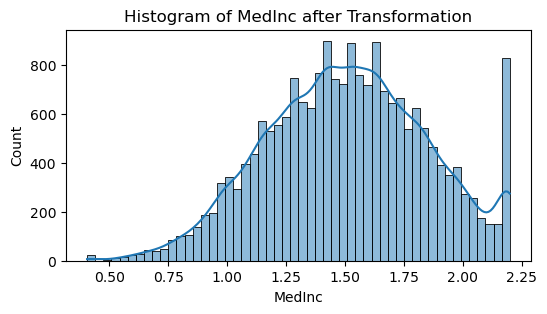

In [542]:
# 8.3. Plotting after transformation
plt.figure(figsize=(6, 3))
sns.histplot(df['MedInc'], kde=True)
plt.title("Histogram of MedInc after Transformation")
plt.show()

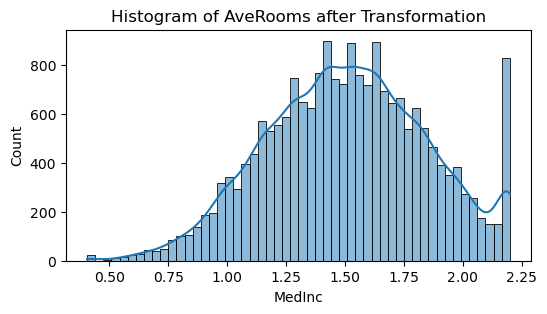

In [544]:
plt.figure(figsize=(6, 3))
sns.histplot(df['MedInc'], kde=True)
plt.title(f'Histogram of AveRooms after Transformation')
plt.show()

In [548]:
# 9.Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MedHouseValue', axis=1))
X = pd.DataFrame(scaled_features,columns=df.drop('MedHouseValue', axis=1).columns)
y = df['MedHouseValue']

In [591]:
## Displaying the preprocessing steps
print("\nPreprocessing Done: \n- Converted to DataFrame\n- Checked for missing values\n- Duplicate rows were checked\n- Detected and handled outliers using IQR\n- Skewness is removed\n- Standardized input features")



Preprocessing Done: 
- Converted to DataFrame
- Checked for missing values
- Duplicate rows were checked
- Detected and handled outliers using IQR
- Skewness is removed
- Standardized input features


For analysis, the dataset california housing is fetched from scikit learn and loaded.The loaded dataset is converted to dataframe for better handling.
The correlation between the variables are found by calling function corr() and plotting the same.The highly correlated variables and variable that does not contribute much to target is removed. In the given dataset Population,AveBedRooms,AveOccup are removed as it does not have much relation with the target.
The dataset after removal is preprocessed as under:

  1. Checking for Missing Values: The dataset doesn't contain missing values. The same is checked using the function isnull().sum().
  2. Duplicate Row Checking: There are no duplicate rows in the dataset.
  3. Handled Outliers: Identified and clipped outliers using IQR method.
  4. Checking Skewness: Checked the skewness of numerical features. For the feature MedInc and AveRooms log transformation is applied to make it more normally distributed.
  5. Feature Scaling:To improve the performance of models and to standardize the numerical features to have a mean of 0 and a standard deviation of 1 scaling is done. 

# 2. Regression Algorithm Implementation

In [595]:
# 1. Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [486]:
# 2. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [488]:
#3. Creating dictionary to store model names and results
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = {}

In [582]:
# 4. Training each model
for name, model in models.items():
    model.fit(X_train, y_train)                                           # Training each model
    y_pred = model.predict(X_test)                                        # Predicting the value based on test data
    
    mse = mean_squared_error(y_test, y_pred)                              # Finding the metrics values to the difference(error) with test and predicted data
    mae = mean_absolute_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)                                        # Calcuating R2 score to check variance if any(how accurate the prediction is)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}                   # Results are stored in a dictionary results
    
    print("Results:" ,name)
    print(f" MAE: {mae:},MSE: {mse:},R2 Score: {r2:}")

Results: Linear Regression
 MAE: 0.613554224390341,MSE: 0.6496262650514492,R2 Score: 0.50425685733357
Results: Decision Tree
 MAE: 0.4333785343992248,MSE: 0.4654722450765261,R2 Score: 0.6447885715027848
Results: Random Forest
 MAE: 0.3244732307412792,MSE: 0.24806370964413688,R2 Score: 0.810697489285262
Results: Gradient Boosting
 MAE: 0.3952539621090979,MSE: 0.32838198709939015,R2 Score: 0.7494049624566737
Results: SVR
 MAE: 0.43551447163084145,MSE: 0.4394585481833437,R2 Score: 0.6646401577824388


In this step each regression algorithms are implemented to train and test data for prediction and each model is evaluated by 
finding the metrics MAE,MSE and R2 to identify the performance each model and to understand how well each model predicts.

1. Linear Regression:A simple algorithm that assumes a linear relationship between the features and the target variable.
2. Decision Tree Regressor: A non-linear model that splits the data into decision nodes to make predictions.
3. Random Forest Regressor: An ensemble method that combines multiple decision trees to improve prediction accuracy.
4. Gradient Boosting Regressor: Another ensemble method that builds trees sequentially, each learning from the mistakes of the previous one.
5. Support Vector Regressor (SVR): A model that finds a hyperplane to maximize the margin between data points, ideal for higher-dimensional data.


# 3. Model Evaluation and Comparison

In [585]:
results_df = pd.DataFrame(results).T  # Storing the results as DataFrame in Transpose
print("\nModel Comparison:")
print(results_df)

best_model = results_df['R2'].idxmax()         # to get the index of best model ie max r2 value of all the model
worst_model = results_df['R2'].idxmin()        # to get the index of worst model ie min r2 value of all the model

print(f"\nBest Performing Model: {best_model} (R2 = {results_df.loc[best_model, 'R2']:})")
print(f"Worst Performing Model: {worst_model} (R2 = {results_df.loc[worst_model, 'R2']:})")



Model Comparison:
                        MSE       MAE        R2
Linear Regression  0.649626  0.613554  0.504257
Decision Tree      0.465472  0.433379  0.644789
Random Forest      0.248064  0.324473  0.810697
Gradient Boosting  0.328382  0.395254  0.749405
SVR                0.439459  0.435514  0.664640

Best Performing Model: Random Forest (R2 = 0.810697489285262)
Worst Performing Model: Linear Regression (R2 = 0.50425685733357)


 The Best Performing Model is Random Forest as it has the highest R2 score (0.81), indicating strong predictive power and 
the lowest MSE and MAE, reflecting minimal error. The least performing model is Linear Regression as the R2 value is only 0.5.